In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('D:/Shubham/Data Science/DS course - Weekend batch/Titanic/Dataset/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# We will divide categorical col and numerical col 

Numerical = data.select_dtypes(exclude = 'object').columns
Numerical

#below cols are numeric type

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [8]:
Categorical = data.select_dtypes(include = 'object').columns
Categorical

#below cols are categorical type 

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [9]:
#Now we will check for missing values in data

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#There are missing values in three columns i.e. Age,Cabin & Embarked 

percent_missing = data.isnull().sum() / len(data) * 100
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
# Now as col 'Cabin' consist 77% missing values, its better to drop that column

data.drop('Cabin',axis = 1,inplace = True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


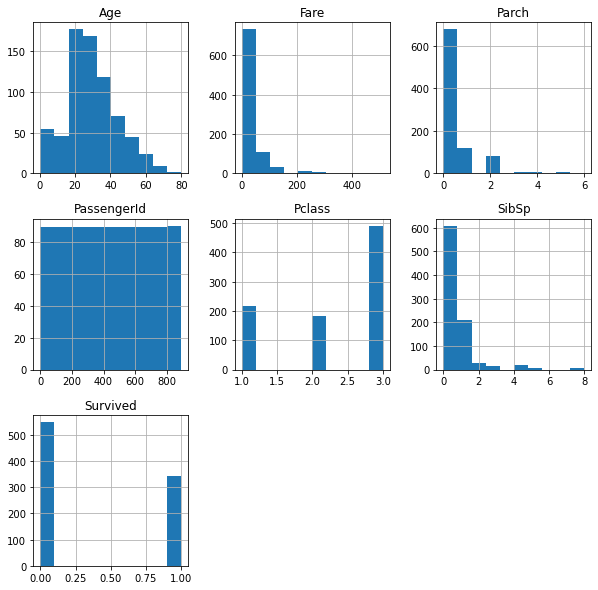

In [12]:
# 'Age' col conisist 19% values so we cannot drop it rather we will fill it with appropriate value.
# For that we can check it with histogram whether to fill it with mean,median or mode

hist = data.hist(figsize=(10,10))

In [13]:
# As Age column is normally distributed we can fill missing values with mean.

data['Age']
mean_age = data['Age'].mean()
data['Age'] = data['Age'].fillna(30)

In [14]:
# There are only two missing values in Embarked column, hence we can replace Na values with mode of that column.
data['Embarked'].mode()

0    S
dtype: object

In [15]:
# Now as we find out that the mode is 'S', lets replace the Na values with 'S'.
data.Embarked.fillna(value = 'S',inplace= True)

In [16]:
#Now as all the missing values are taken care of, lets check if there is still a missing value or not.

data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
# Now as missing values are taken care of we will change dtypes of certain columns in order to do our analysis smoothly.
# We will change dtypes of following columns('Survived', 'Pclass', 'Sex','Embarked' as category, and 'Age' as 'int')

data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [18]:
data['Survived'] = data['Survived'].astype('category')
data['Pclass'] = data['Pclass'].astype('category')
data['Sex'] = data['Sex'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')
data['Age'] = data['Age'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.7+ KB


In [19]:
# Lets check the five point summary of numerical columns of the data.

data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.742985,0.523008,0.381594,32.204208
std,257.353842,13.011583,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


# Univariate analysis 

Out of 891 population 549 people died
Total death percentag is : 62.0 %


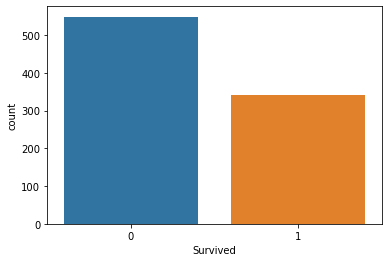

In [20]:
#  We will start with as 'Survived' column is a target feature.
death = data['Survived'].value_counts().values[0]
print('Out of 891 population {} people died'.format(death))
print('Total death percentag is :',round((data['Survived'].value_counts().values[0]/891)*100),'%')

sns.countplot(data['Survived'])

In [21]:
# Pclass column

print(data['Pclass'].value_counts()/891*100)
plt.figure(figsize=('10,10'))
sns.countplot(data['Pclass'])
plt.title('Passenger class wise distribution')


3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# Sex column

print(data['Sex'].value_counts()/891*100)

sns.countplot(data['Sex'])
plt.title('Sex wise distribution')
plt.ylabel('Population count')

In [ ]:
# SibSp column

print(data['SibSp'].value_counts())
sns.countplot(data['SibSp'])

#Conclusion : Most of the population was travelling alone without siblings or spouse.

In [ ]:
# Parch column
print(data['Parch'].value_counts())

sns.countplot(data['Parch'])

# Most of the population was travelling without Parents or child.

In [ ]:
# Embarked column

print(data['Embarked'].value_counts()/891*100)

sns.countplot(data['Embarked'])

# Conclusion : Most of the population was going to 'S' named city

In [ ]:
# Age column

sns.distplot(data['Age'])
print('Skewness :',data['Age'].skew())
print('Peakdness :',data['Age'].kurt())

#Conclusion : We can say that the Age column is kind of normally distributed.

In [ ]:
# We will check Age column through boxplot to find out outliers.

sns.boxplot(data['Age'])

In [ ]:
# Fare column

sns.distplot(data['Fare'])
print('Skewness :',data['Fare'].skew())
print('Peakdness :',data['Fare'].kurt())

# Conclusion : Fare column is right skewed as lot of people purchased cheaper tickets.

In [ ]:
# We will check Fare column through boxplot to find out outliers

plt.figure(figsize= (15,5))
sns.boxplot(data['Fare'])

#Conclusion : Outliers are there in data 

# Multivariate analysis 

In [ ]:
# With Survived and Pclass columns

sns.countplot(data['Survived'],hue=data['Pclass'])

print(pd.pivot_table(data,values='PassengerId',index = 'Pclass',columns='Survived',aggfunc='count'))

In [ ]:
pd.pivot_table(data,values= 'PassengerId',index='Sex',columns='Survived',aggfunc='count')

sns.countplot(data['Survived'],hue=data['Sex'])

In [ ]:
sns.countplot(data['Survived'],hue=data['Embarked'])

pd.crosstab(data['Embarked'],data['Survived'])

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data[data['Survived'] == 0]['Age'])
sns.distplot(data[data['Survived'] == 1]['Age'])

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data[data['Survived']== 0]['Fare'])
sns.distplot(data[data['Survived']== 1]['Fare'])

In [ ]:
data.head()

In [ ]:
sns.pairplot(data)

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr())

In [ ]:
# Feature Engineering 
# I will create a new column as family_size and add both parch & sibsp columns

data['Family_size'] = data['SibSp']+data['Parch']

In [ ]:
def Family_type(number):
    if number == 0:
        return 'Alone'
    elif number>0 and number<=4:
        return 'Medium'
    else:
        return 'Large'

In [ ]:
data['Family_type']= data['Family_size'].apply(Family_type)
data.head()

In [ ]:
data.drop(columns= ['SibSp','Parch','Family_size'],inplace=True)

In [ ]:
pd.crosstab(data['Family_type'],data['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

# Handling Outliers

In [ ]:
# We will first check the distribution of all the columns, to decide which technique to use for outlier detection.
plt.figure(figsize=(10,5))
sns.distplot(data['Age'])

In [ ]:
# As 'Age' column is kind of normally distributed so we can use Z-Score to detect outliers

highest_allowed =  data['Age'].mean() + 3 * data['Age'].std()
lowest_allowed = data['Age'].mean() - 3 * data['Age'].std()

In [ ]:
highest_allowed

In [ ]:
# Lowest_allowed is not needed as age column contains only positive outliers.
lowest_allowed

In [ ]:
# Now as we know the outlier, we can either trim outliers or do capping. In this case we will trim outliers.

new_data = data[data['Age'] < highest_allowed]
new_data

#Now we have excluded all the outlier rows and stored remaining into new dataframe 'new_data'

In [ ]:
# Outliers detection using boxplot
plt.figure(figsize=(10,7))
sns.boxplot(data['Age'])
plt.title('Age Distribution')